In [1]:
!pip install ripser

In [2]:
from pymoo.problems import get_problem
from tqdm import tqdm
import pandas as pd
from utils import *
from pymoo.vendor.vendor_coco import COCOProblem
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import time

from ripser import ripser
from persim import plot_diagrams

In [3]:
def generate_points_on_line(start_point, end_point, num_points):
    t_values = np.linspace(0, 1, num_points)
    start_point = np.array(start_point)
    end_point = np.array(end_point)
    points_on_line = start_point + t_values[:, np.newaxis] * (end_point - start_point)
    return points_on_line

def diagram_points(x):
    N = len(x)
    I = np.arange(N-1)
    J = np.arange(1, N)
    V = np.maximum(x[0:-1], x[1::])
    I = np.concatenate((I, np.arange(N)))
    J = np.concatenate((J, np.arange(N)))
    V = np.concatenate((V, x))
    #Create the sparse distance matrix
    D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
    dgm0 = ripser(D, maxdim=0, distance_matrix=True)['dgms'][0]
    dgm0 = dgm0[dgm0[:, 1]-dgm0[:, 0] > 1e-3, :]
    allgrid = np.unique(dgm0.flatten())
    allgrid = allgrid[allgrid < np.inf]
    xs = np.unique(dgm0[:, 0])
    ys = np.unique(dgm0[:, 1])
    ys = ys[ys < np.inf]
    return xs, ys, dgm0

In [4]:
start = [-7, -7]
end = [7, 7]

#start = [-7, 0]
#end = [7, 0]

#start = [0, -7]
#end = [0, 7]

num_points = 1000
coco_instance = 1
dim = 2

points = generate_points_on_line(start, end, num_points)

# Line search

In this case, we take a 2D BBOB function and perform a line search over the interval defined above. Below are the plots for the lines obtained by following the diagonal line from start to end with num_points samples.

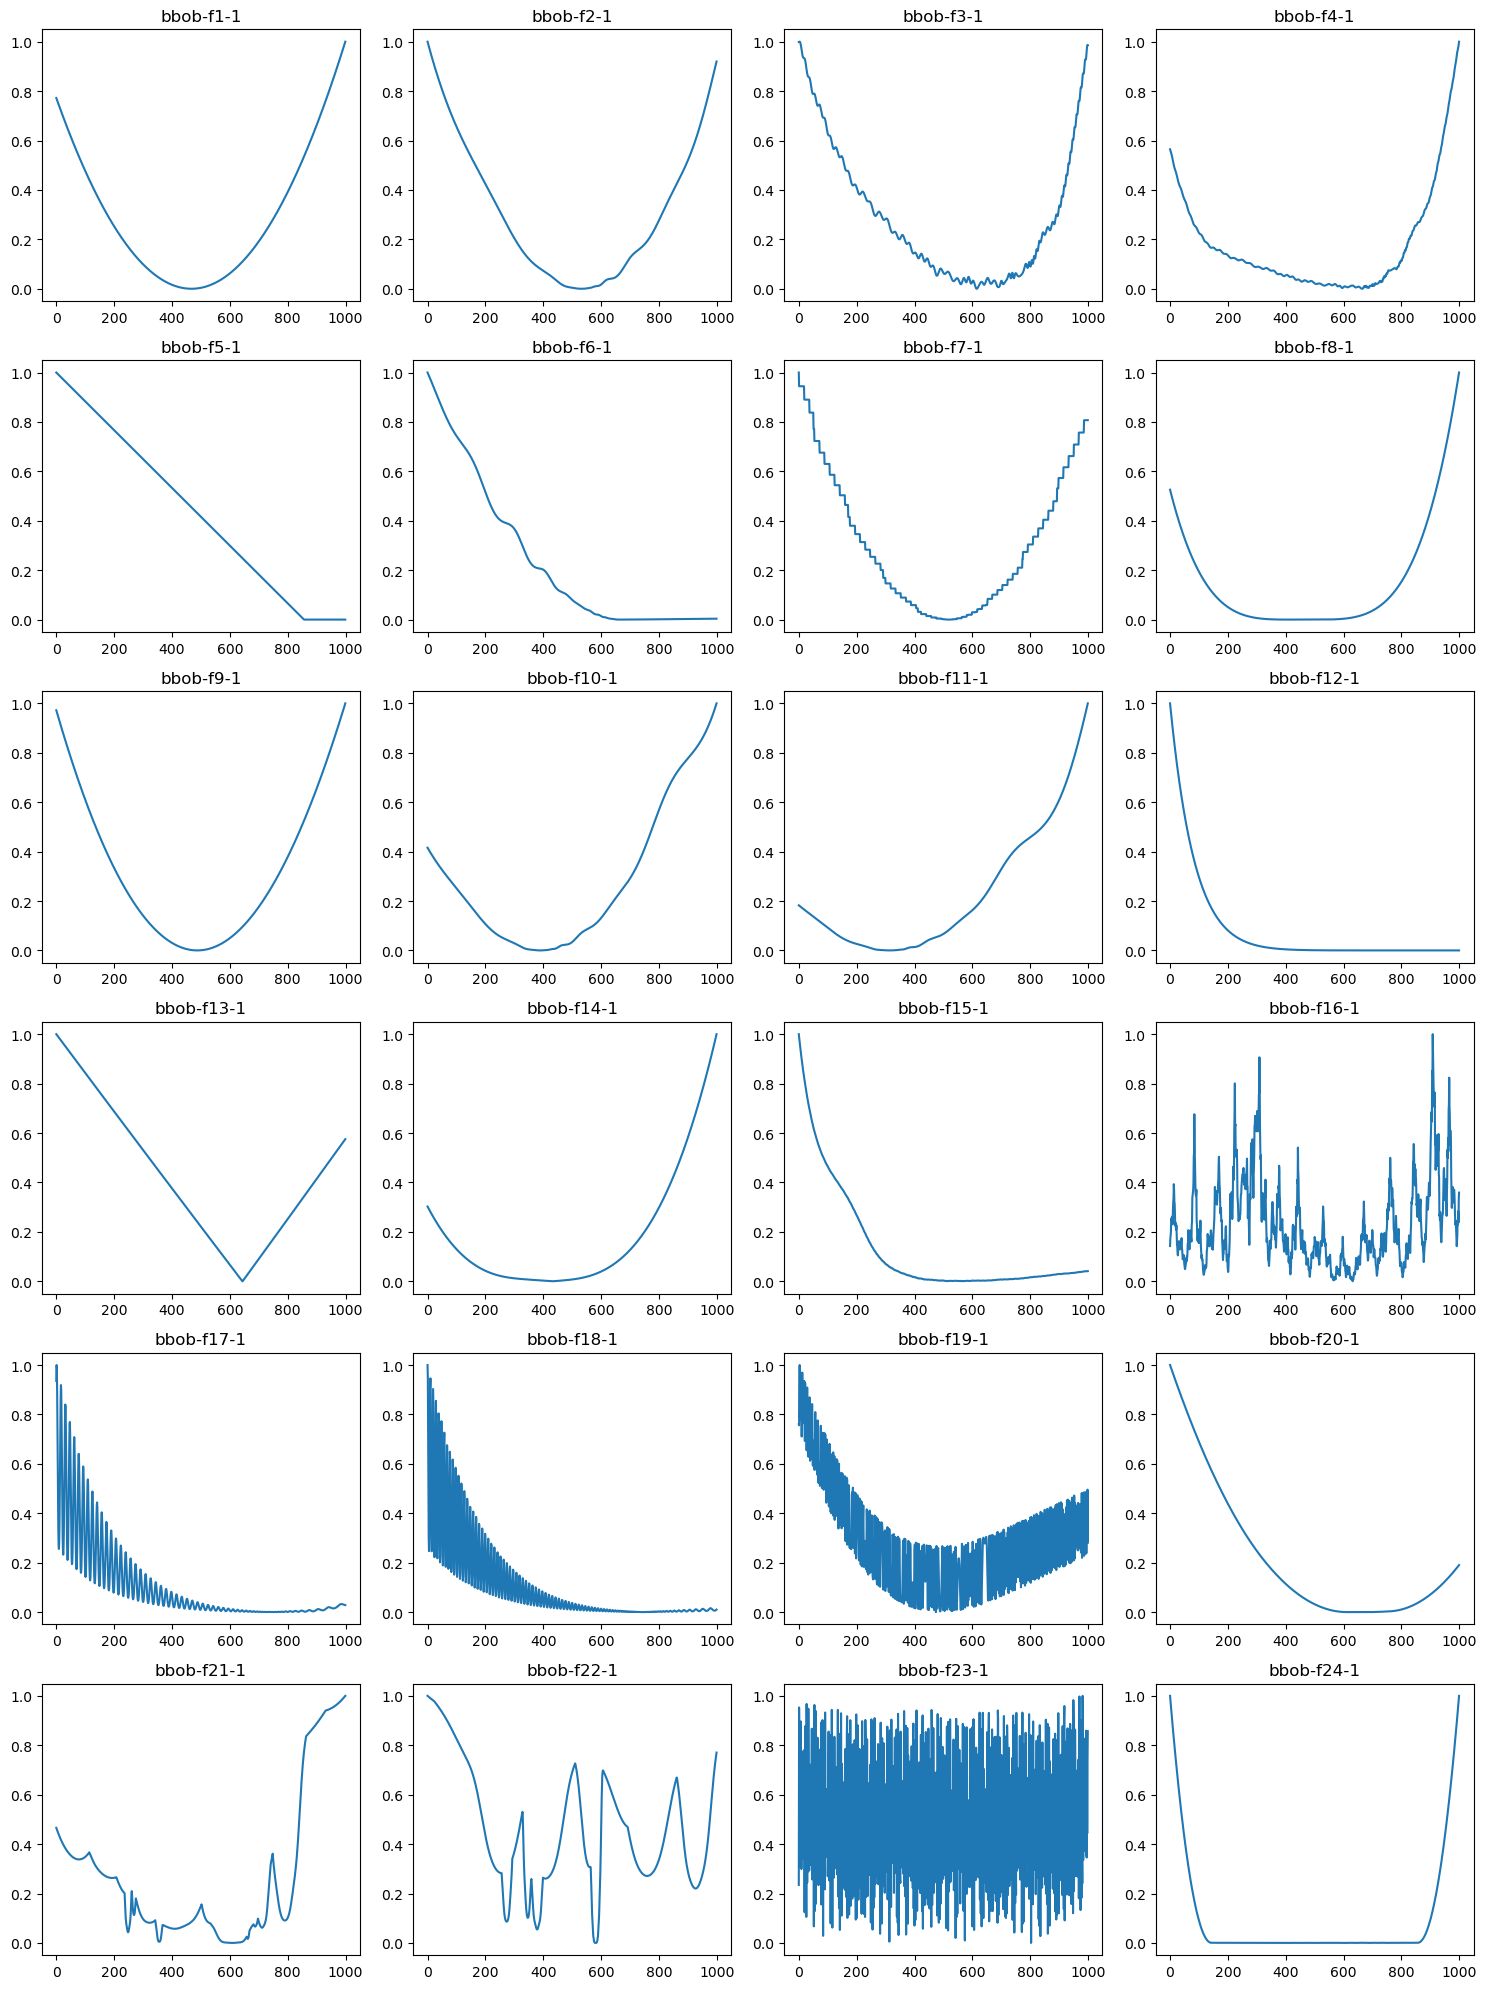

In [5]:
fig, axs = plt.subplots(6, 4, figsize=(15, 20))
for i, ax in enumerate(axs.flatten()):
    problem_name = f"bbob-f{i+1}-{coco_instance}"
    problem = COCOProblem(problem_name, n_var=dim)
    y = problem.evaluate(points).flatten()
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    ax.plot(y)
    ax.set_title(problem_name)
plt.tight_layout()
plt.savefig(f'figures/functions.pdf', bbox_inches='tight', pad_inches=0)

# Persistance diagrams of BBOB functions

Note the number of points above each subfigure, which roughly corresponds to the number of local minima of each function.

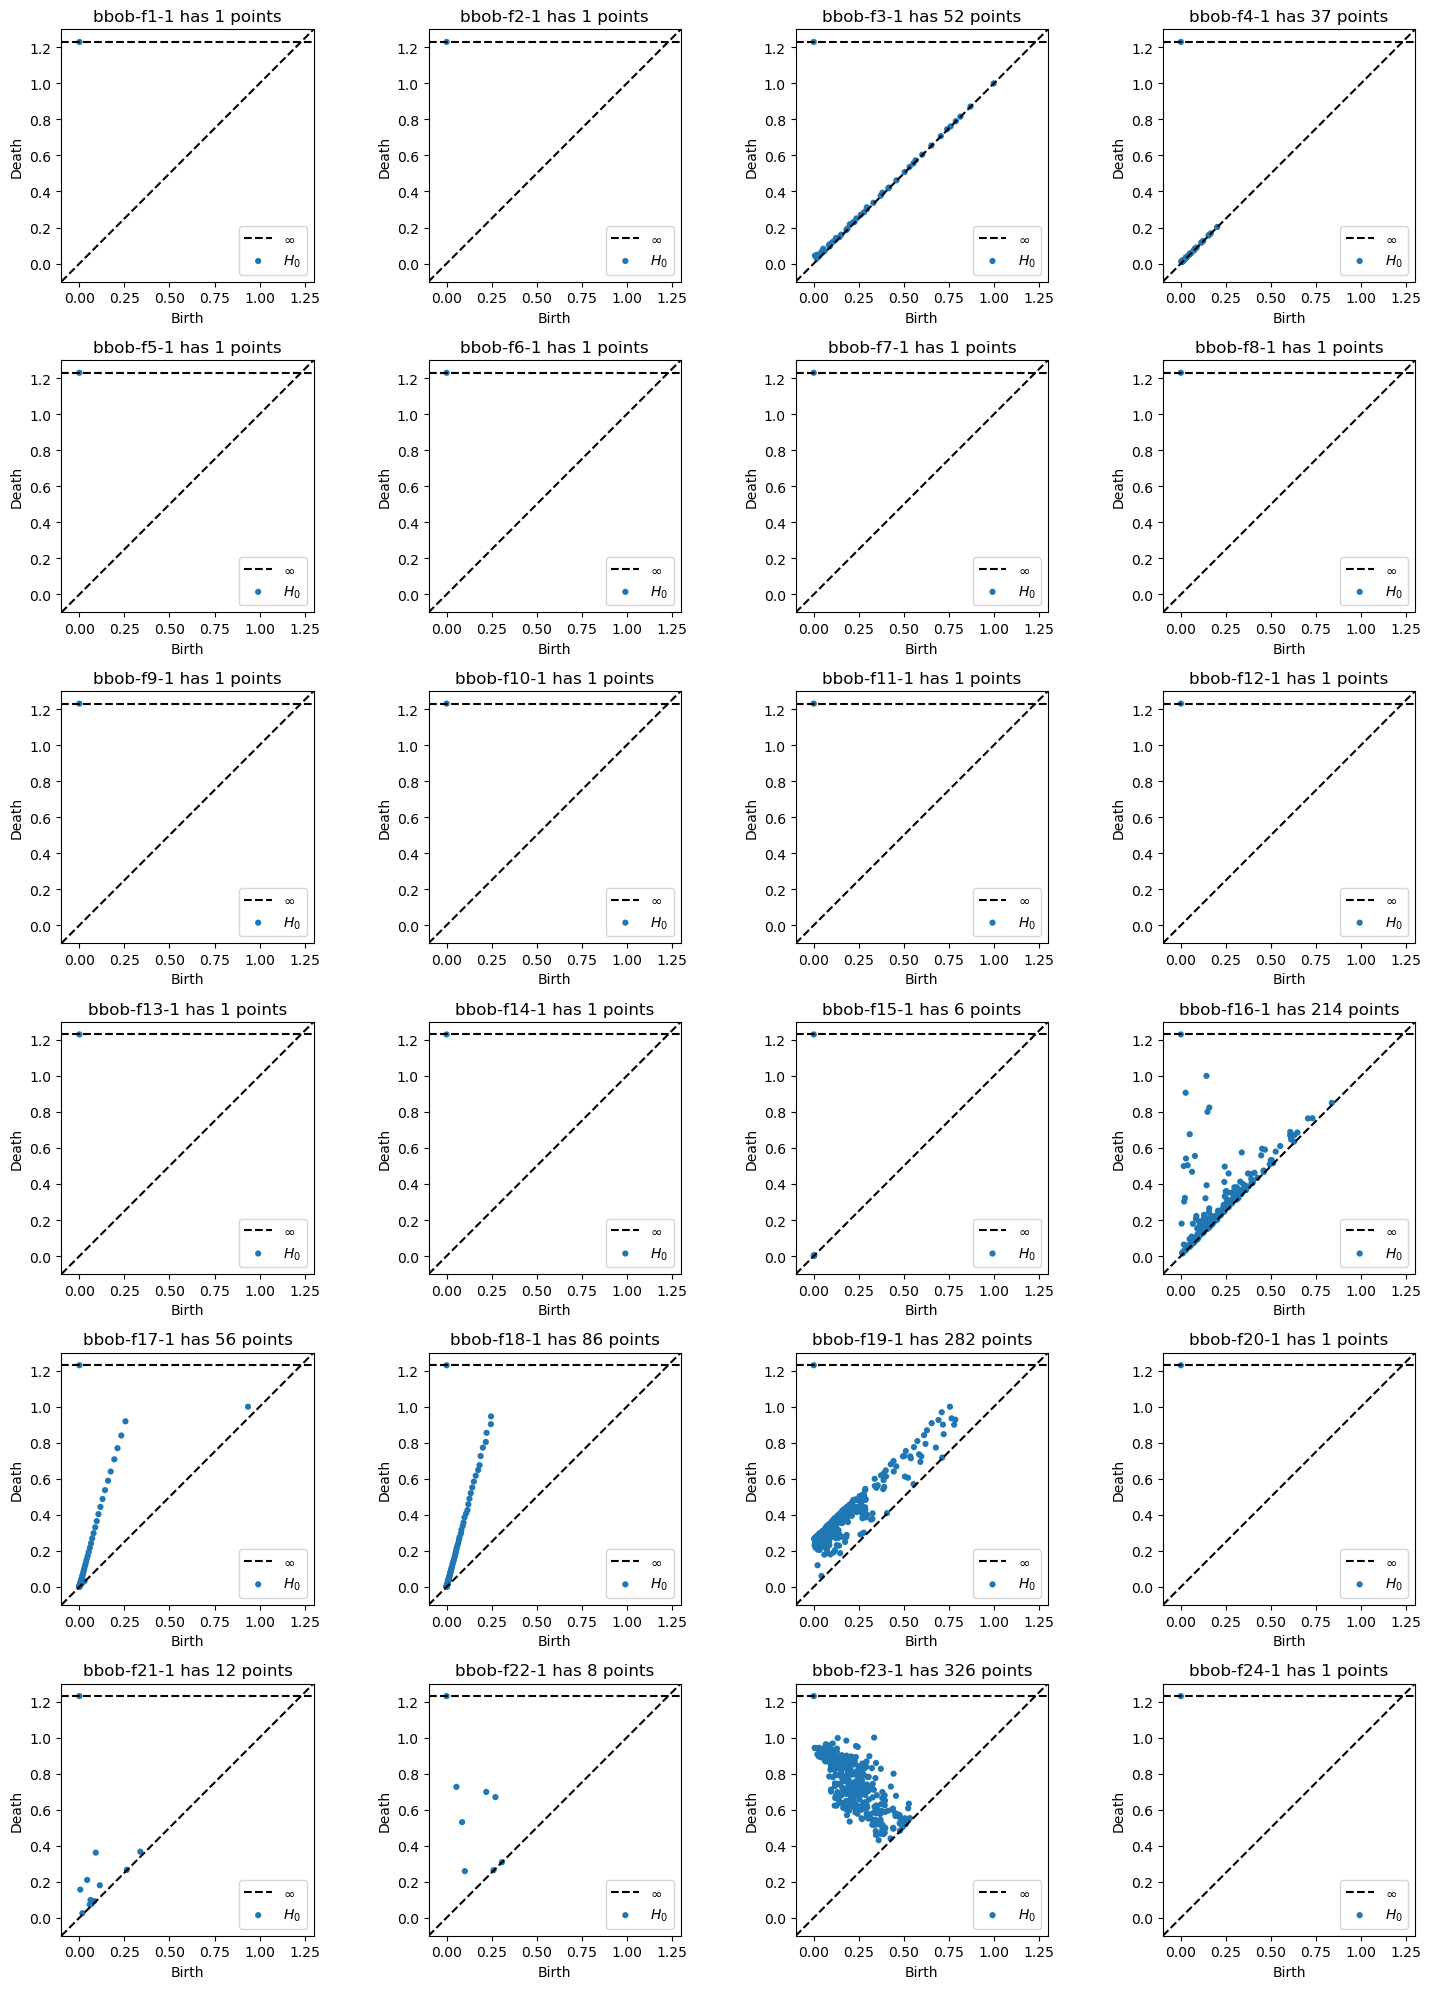

In [6]:
fig, axs = plt.subplots(6, 4, figsize=(15, 20))
for i, ax in enumerate(axs.flatten()):
    problem_name = f"bbob-f{i+1}-{coco_instance}"
    problem = COCOProblem(problem_name, n_var=dim)
    y = problem.evaluate(points).flatten()
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    _, _, dgm0 = diagram_points(y)
    max_v = 1.3
    min_v = -0.1
    plot_diagrams(dgm0, ax=ax, xy_range=[min_v, max_v, min_v, max_v])
    ax.set_title(f"{problem_name} has {len(dgm0)} points")
plt.tight_layout()
plt.savefig(f'figures/persistance.pdf', bbox_inches='tight', pad_inches=0)

# Persistance bars of BBOB functions

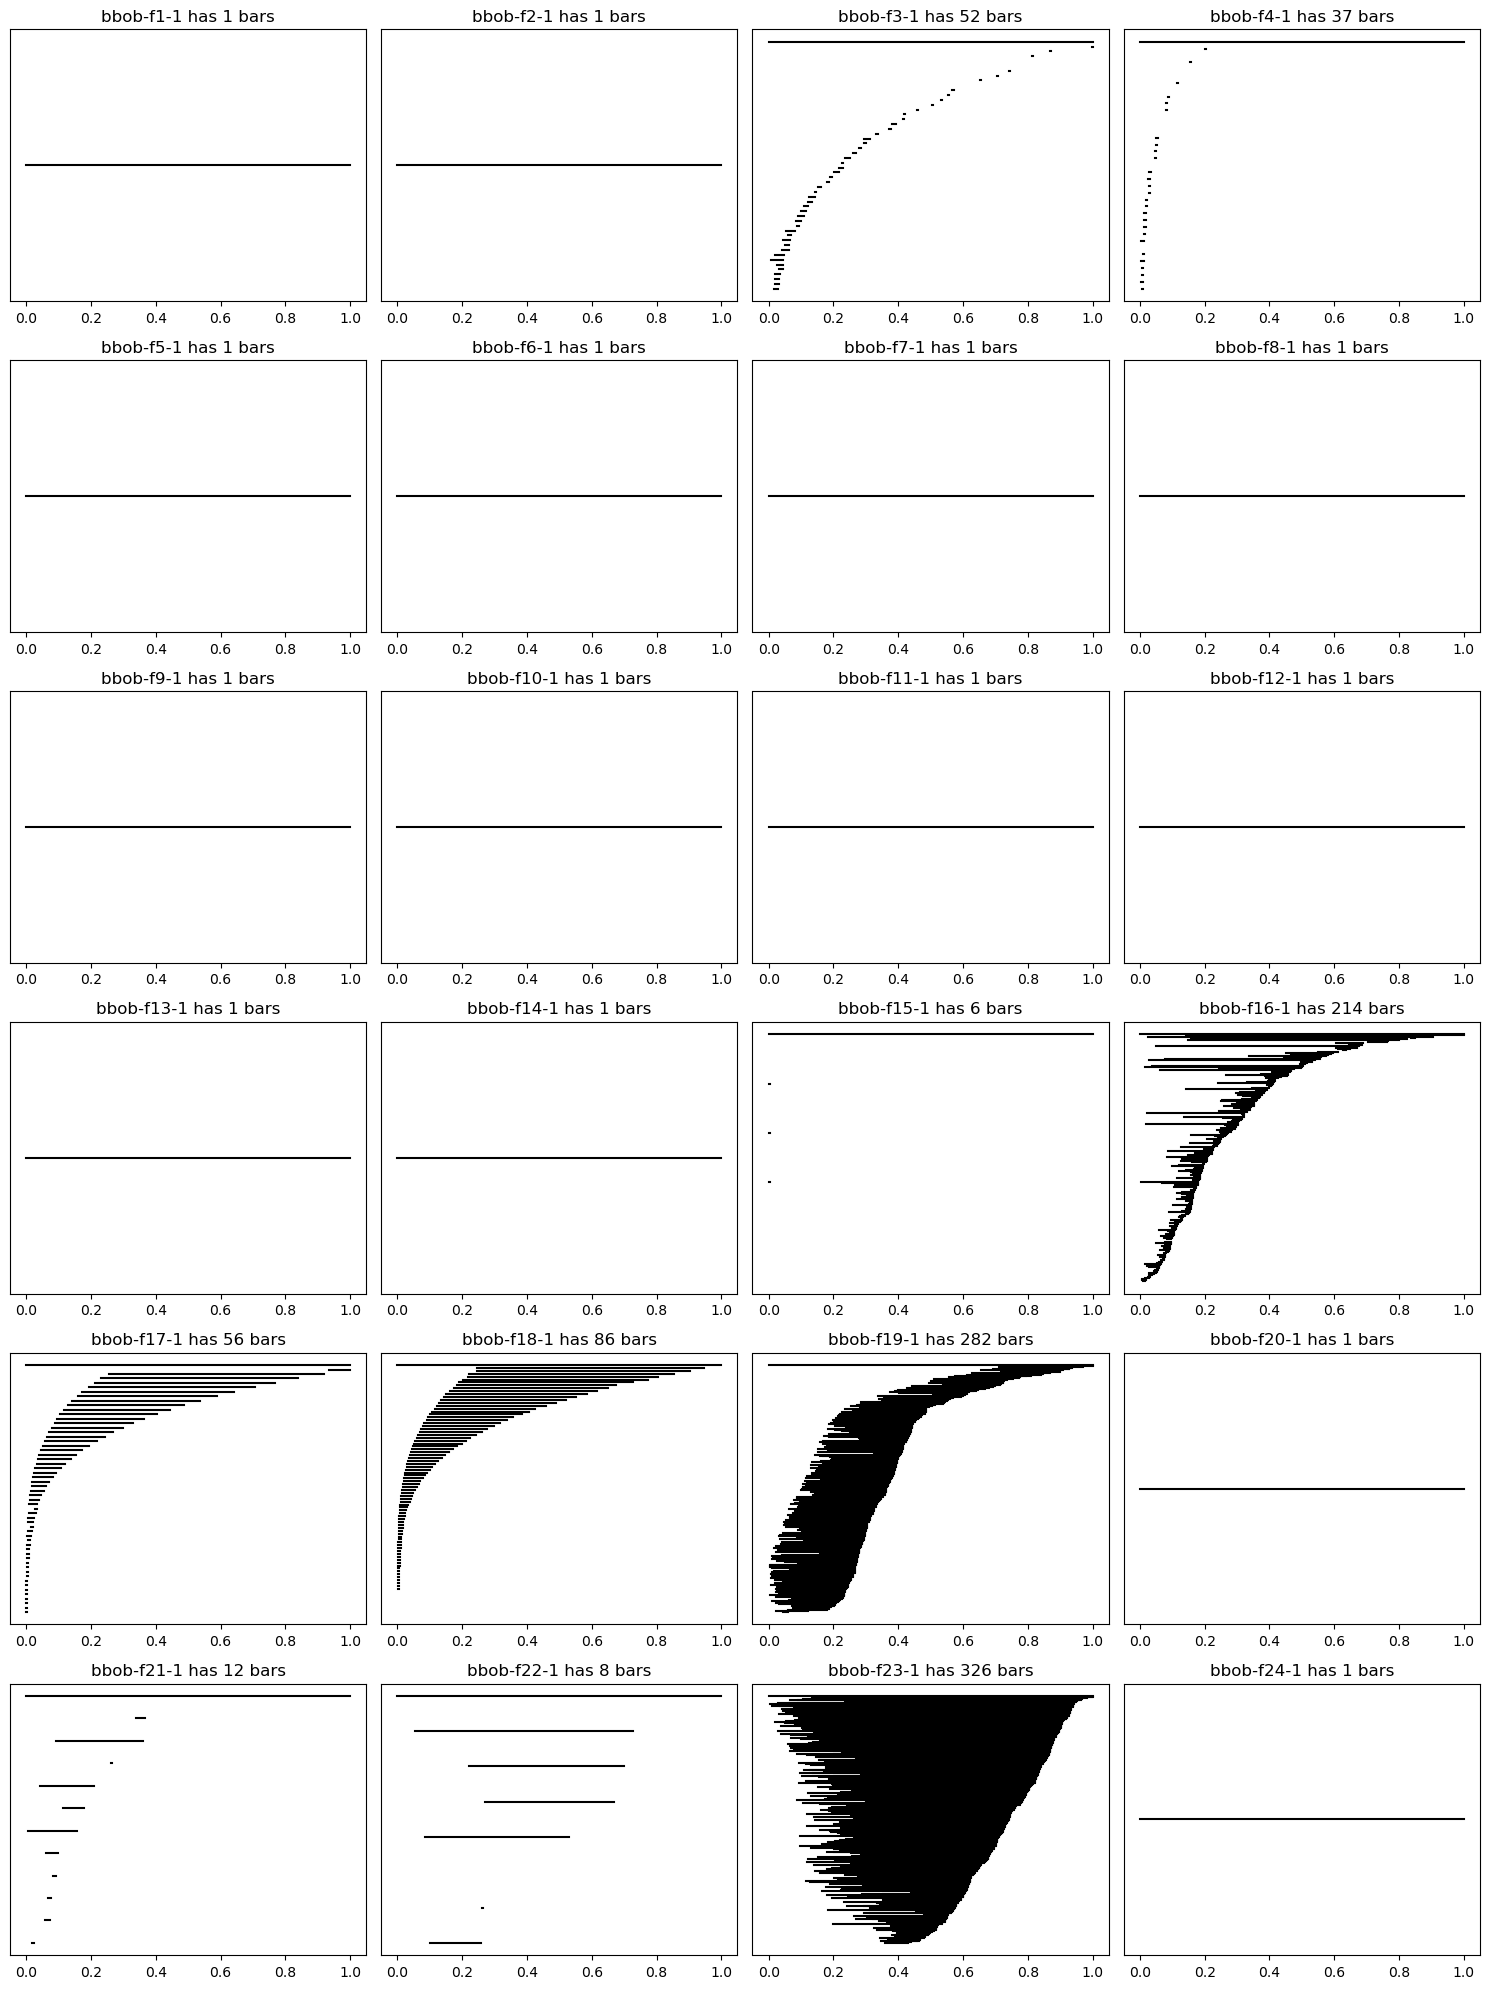

In [7]:
fig, axs = plt.subplots(6, 4, figsize=(15, 20))
for i, ax in enumerate(axs.flatten()):
    problem_name = f"bbob-f{i+1}-{coco_instance}"
    problem = COCOProblem(problem_name, n_var=dim)
    y = problem.evaluate(points).flatten()
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    _, _, dgm0 = diagram_points(y)
    dgm0[np.isinf(dgm0)] = 1
    for i, (start, end) in enumerate(dgm0):
        ax.plot([start, end], [i, i], color='black')
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_title(f"{problem_name} has {len(dgm0)} bars")
plt.tight_layout()
plt.savefig(f'figures/bars.pdf', bbox_inches='tight', pad_inches=0)